# Project: Investigate English Premier League from 2008 to 2016

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> For this data analysis, we will look into soccerdata provided from https://www.kaggle.com/hugomathien/soccer. In particular, we will have a closer look at the English Premier League. The data consists of match data, team data and player data from season 2008 to 2016. 

> The most important columns for data analysis have been preselected and extracted via SQL. The queries are attached as a file(queries.sql). A description of each column can be found in the attached file (description.pdf).

> The files are saved in the working directory as `match_data.csv`, `team_data.csv` and `player_data.csv`. For this analysis, we will deeply investigate the English Premier League and look at the provided match data. 

> We will look at the betting provider 'Bet365' and its projected outcome on each match compared to the true outcome. We will look the ability of the bookkeeper to predict the match outcome.

> The analysed dependent variable is: actual_game_outcome (to be created)

> The independent variable: projected_outcome (to be created) 

> Futhermore, as a huge Manchester United Fan, I will look at the season results of the team compared to their two biggest rivals (Liverpool and Manchester City) and draw explanations based on my soccer knowledge.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df_match = pd.read_csv('match_data.csv')

In [3]:
# Currently df_match consists of two countries(German and English). Seperate English & German ones 
# and safe in new df
df_match_eng = df_match[df_match['country_name'] == 'England']
df_match_ger = df_match[df_match['country_name'] == 'Germany']

df_match_eng.head(5)

,league_name,country_name,season,stage,date,home_team_name,away_team_name,home_team_goal,away_team_goal,B365H,B365D,B365A
0,England Premier League,England,2008/2009,1,2008-08-17 00:00:00,Manchester United,Newcastle United,1,1,1.29,5.5,11.00
1,England Premier League,England,2008/2009,1,2008-08-16 00:00:00,Arsenal,West Bromwich Albion,1,0,1.20,6.5,15.00
2,England Premier League,England,2008/2009,1,2008-08-16 00:00:00,Sunderland,Liverpool,0,1,5.50,3.6,1.67
3,England Premier League,England,2008/2009,1,2008-08-16 00:00:00,West Ham United,Wigan Athletic,2,1,1.91,3.4,4.20
4,England Premier League,England,2008/2009,1,2008-08-17 00:00:00,Aston Villa,Manchester City,4,2,1.91,3.4,4.33


In [4]:
# Look at table info for missing data
df_match_eng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3040 entries, 0 to 3039
Data columns (total 12 columns):
league_name       3040 non-null object
country_name      3040 non-null object
season            3040 non-null object
stage             3040 non-null int64
date              3040 non-null object
home_team_name    3040 non-null object
away_team_name    3040 non-null object
home_team_goal    3040 non-null int64
away_team_goal    3040 non-null int64
B365H             3040 non-null float64
B365D             3040 non-null float64
B365A             3040 non-null float64
dtypes: float64(3), int64(3), object(6)
memory usage: 308.8+ KB


In [5]:
# check whether draws are ever the most likely outcome
df_match_eng[(df_match_eng['B365D'] < df_match_eng['B365H']) & (df_match_eng['B365D'] < df_match_eng['B365A'])]

,league_name,country_name,season,stage,date,home_team_name,away_team_name,home_team_goal,away_team_goal,B365H,B365D,B365A


In [6]:
# create projected outcome column based on bookkeepers provided odds and actual outcome based on final result
# the lowest odds provided are the bookkepers favourites
# based on previous output, we can ignore the case that draws are ever the most likely outcome
# hence we only look at either home favourite vs away favourite

# define the functions
def label_bookies_team(df):
    if df['B365H'] < df['B365A']:
        return df['home_team_name']
    if df['B365A'] < df['B365D']:
        return df['away_team_name']
    else:
        return 'Draw'

def label_bookies_outcome(df):
    if df['B365H'] < df['B365A']:
        return 'Home Win'
    if df['B365A'] < df['B365D']:
        return 'Away Win'
    else:
        return 'Draw'

def actual_outcome_team(df):
    if df['home_team_goal'] > df['away_team_goal']:
        return df['home_team_name']
    if df['home_team_goal'] < df['away_team_goal']:
        return df['away_team_name']
    else:
        return 'Draw'
    
def actual_outcome(df):
    if df['home_team_goal'] > df['away_team_goal']:
        return 'Home Win'
    if df['home_team_goal'] < df['away_team_goal']:
        return 'Away Win'
    else:
        return 'Draw'
    
def actual_vs_predicted(df):
    if df['B365_projected_outcome'] == df['actual_outcome']:
        return True
    else:
        return False

In [7]:
# apply the function and save the pandas series in a new column in the dataframe
df_match_eng["B365_projected_winning_team"] = df_match_eng.apply(lambda df: label_bookies_team(df), axis=1)
df_match_eng["actual_winning_team"] = df_match_eng.apply(lambda df: actual_outcome_team(df), axis=1)
df_match_eng["B365_projected_outcome"] = df_match_eng.apply(lambda df: label_bookies_outcome(df), axis=1)
df_match_eng["actual_outcome"] = df_match_eng.apply(lambda df: actual_outcome(df), axis=1)
df_match_eng["actual_vs_predicted_outcome"] = df_match_eng.apply(lambda df: actual_vs_predicted(df), axis=1)

df_match_eng.head(5)

/Users/hoangnym94/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hoangnym94/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hoangnym94/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

,league_name,country_name,season,stage,date,home_team_name,away_team_name,home_team_goal,away_team_goal,B365H,B365D,B365A,B365_projected_winning_team,actual_winning_team,B365_projected_outcome,actual_outcome,actual_vs_predicted_outcome
0,England Premier League,England,2008/2009,1,2008-08-17 00:00:00,Manchester United,Newcastle United,1,1,1.29,5.5,11.00,Manchester United,Draw,Home Win,Draw,False
1,England Premier League,England,2008/2009,1,2008-08-16 00:00:00,Arsenal,West Bromwich Albion,1,0,1.20,6.5,15.00,Arsenal,Arsenal,Home Win,Home Win,True
2,England Premier League,England,2008/2009,1,2008-08-16 00:00:00,Sunderland,Liverpool,0,1,5.50,3.6,1.67,Liverpool,Liverpool,Away Win,Away Win,True
3,England Premier League,England,2008/2009,1,2008-08-16 00:00:00,West Ham United,Wigan Athletic,2,1,1.91,3.4,4.20,West Ham United,West Ham United,Home Win,Home Win,True
4,England Premier League,England,2008/2009,1,2008-08-17 00:00:00,Aston Villa,Manchester City,4,2,1.91,3.4,4.33,Aston Villa,Aston Villa,Home Win,Home Win,True


In [8]:
# check newly created table for missing data
df_match_eng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3040 entries, 0 to 3039
Data columns (total 17 columns):
league_name                    3040 non-null object
country_name                   3040 non-null object
season                         3040 non-null object
stage                          3040 non-null int64
date                           3040 non-null object
home_team_name                 3040 non-null object
away_team_name                 3040 non-null object
home_team_goal                 3040 non-null int64
away_team_goal                 3040 non-null int64
B365H                          3040 non-null float64
B365D                          3040 non-null float64
B365A                          3040 non-null float64
B365_projected_winning_team    3040 non-null object
actual_winning_team            3040 non-null object
B365_projected_outcome         3040 non-null object
actual_outcome                 3040 non-null object
actual_vs_predicted_outcome    3040 non-null bool
dtypes: boo

In [9]:
# create dataframes for the three clubs: Manchester United, Manchester City and Liverpool to compare their
# season results from 2008 to 2016

df_three_rivals = df_match_eng.query('home_team_name in ("Manchester United", "Liverpool", "Manchester City")'
                    'or away_team_name in ("Manchester United", "Liverpool", "Manchester City")')

df_three_rivals.reset_index(inplace=True)
df_three_rivals.drop(['index'], axis=1, inplace = True)

/Users/hoangnym94/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
df_three_rivals.head(10)

,league_name,country_name,season,stage,date,home_team_name,away_team_name,home_team_goal,away_team_goal,B365H,B365D,B365A,B365_projected_winning_team,actual_winning_team,B365_projected_outcome,actual_outcome,actual_vs_predicted_outcome
0,England Premier League,England,2008/2009,1,2008-08-17 00:00:00,Manchester United,Newcastle United,1,1,1.29,5.50,11.00,Manchester United,Draw,Home Win,Draw,False
1,England Premier League,England,2008/2009,1,2008-08-16 00:00:00,Sunderland,Liverpool,0,1,5.50,3.60,1.67,Liverpool,Liverpool,Away Win,Away Win,True
2,England Premier League,England,2008/2009,1,2008-08-17 00:00:00,Aston Villa,Manchester City,4,2,1.91,3.40,4.33,Aston Villa,Aston Villa,Home Win,Home Win,True
3,England Premier League,England,2008/2009,10,2008-10-29 00:00:00,Manchester United,West Ham United,2,0,1.20,6.00,19.00,Manchester United,Manchester United,Home Win,Home Win,True
4,England Premier League,England,2008/2009,10,2008-10-29 00:00:00,Middlesbrough,Manchester City,2,0,2.88,3.30,2.50,Manchester City,Middlesbrough,Away Win,Home Win,False
5,England Premier League,England,2008/2009,10,2008-10-29 00:00:00,Liverpool,Portsmouth,1,0,1.33,5.00,10.00,Liverpool,Liverpool,Home Win,Home Win,True
6,England Premier League,England,2008/2009,11,2008-11-01 00:00:00,Manchester United,Hull City,4,3,1.17,7.00,17.00,Manchester United,Manchester United,Home Win,Home Win,True
7,England Premier League,England,2008/2009,11,2008-11-01 00:00:00,Tottenham Hotspur,Liverpool,2,1,3.50,3.30,2.10,Liverpool,Tottenham Hotspur,Away Win,Home Win,False
8,England Premier League,England,2008/2009,11,2008-11-02 00:00:00,Bolton Wanderers,Manchester City,2,0,3.00,3.30,2.38,Manchester City,Bolton Wanderers,Away Win,Home Win,False
9,England Premier League,England,2008/2009,12,2008-11-08 00:00:00,Arsenal,Manchester United,2,1,3.25,3.25,2.30,Manchester United,Arsenal,Away Win,Home Win,False


### Data Cleaning 

Since the data we use do not have any missing rows, we will not need any more data cleaning than already processed.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### How well does Bet365 predict the game outcome?

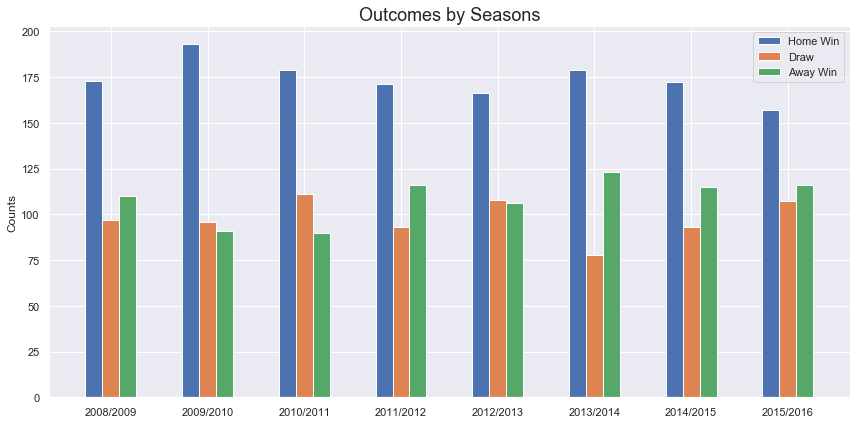

In [49]:
# Have a look at how home wins, draws, away wins are spread throughout the seasons
labels = list(df_match_eng["season"].unique())
home_wins = []
draws = []
away_wins = []

for season in labels:
    df_season = df_match_eng[df_match_eng["season"] == season]
    home_wins.append(df_season[df_season["actual_outcome"] == "Home Win"]["actual_outcome"].count())
    draws.append(df_season[df_season["actual_outcome"] == "Draw"]["actual_outcome"].count())
    away_wins.append(df_season[df_season["actual_outcome"] == "Away Win"]["actual_outcome"].count())

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12,6))
data1 = ax.bar(x - width/2, home_wins, width/2, label='Home Win')
data2 = ax.bar(x, draws, width/2, label='Draw')
data3 = ax.bar(x + width/2, away_wins, width/2, label='Away Win')

# Add some text for labels etc.
ax.set_ylabel('Counts')
ax.set_title('Outcomes by Seasons', size="18")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

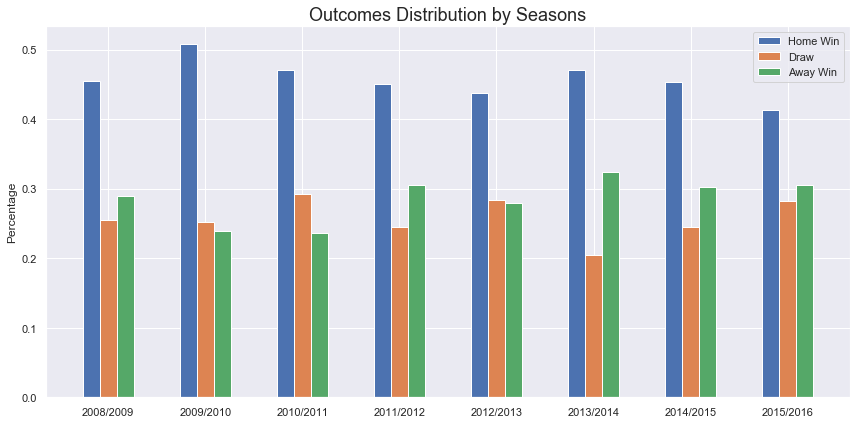

Average Percentage Home Wins over all seasons: 0.45723684210526316
Average Percentage Draws over all seasons: 0.2575657894736842
Average Percentage Away Wins over all seasons: 0.2851973684210526


In [50]:
# Make the same but in proportions
season_matches = 380
home_wins_perc = [x / season_matches for x in home_wins]
draws_perc = [x / season_matches for x in draws]
away_wins_perc = [x / season_matches for x in away_wins]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12,6))
data1 = ax.bar(x - width/2, home_wins_perc, width/2, label='Home Win')
data2 = ax.bar(x, draws_perc, width/2, label='Draw')
data3 = ax.bar(x + width/2, away_wins_perc, width/2, label='Away Win')

# Add some text for labels etc.
ax.set_ylabel('Percentage')
ax.set_title('Outcomes Distribution by Seasons', size="18")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc="upper right")

fig.tight_layout()

plt.show()

print("Average Percentage Home Wins over all seasons: " + str(np.mean(home_wins_perc)))
print("Average Percentage Draws over all seasons: " + str(np.mean(draws_perc)))
print("Average Percentage Away Wins over all seasons: " + str(np.mean(away_wins_perc)))

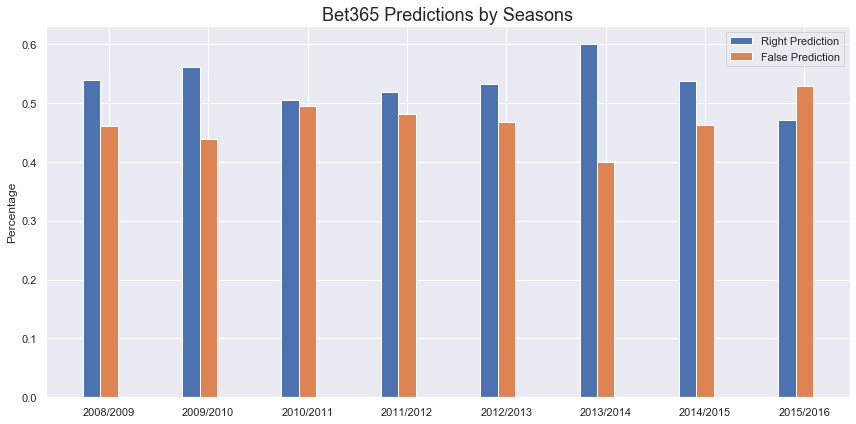

Average Percentage Bet365 predicted right outcome: 0.5328947368421053


In [51]:
# Calculate the percentage bookkeepers were right in each season
season_matches = 380
labels = list(df_match_eng["season"].unique())
right_prediction = []
false_prediction = []

for season in labels:
    df_season = df_match_eng[df_match_eng["season"] == season]
    right_prediction.append(df_season[df_season["actual_vs_predicted_outcome"] == True]["actual_outcome"].count())
    false_prediction.append(df_season[df_season["actual_vs_predicted_outcome"] == False]["actual_outcome"].count())

right_perc = [x / season_matches for x in right_prediction]
false_perc = [x / season_matches for x in false_prediction]
    
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12,6))
data1 = ax.bar(x - width/2, right_perc, width/2, label='Right Prediction')
data2 = ax.bar(x, false_perc, width/2, label='False Prediction')

# Add some text for labels etc.
ax.set_ylabel('Percentage')
ax.set_title('Bet365 Predictions by Seasons', size="18")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

print("Average Percentage Bet365 predicted right outcome: " + str(np.mean(right_perc)))

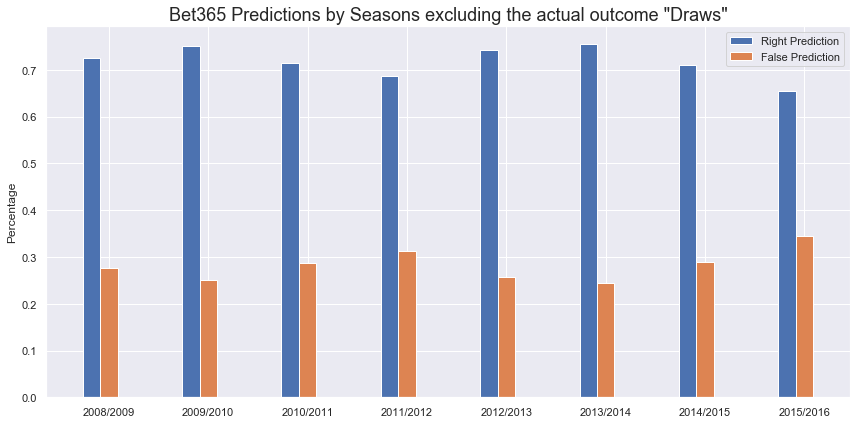

Average Percentage Bet365 predicted right outcome: 0.7173300522192819


In [52]:
# in order to receive fairer result for the bookies, 
# we will drop all rows where the actual outcome was draw since bookkeepers 
# never assign draws to be the most likely outcome

season_matches = list(np.ones([len(labels)]))
season_matches = [380*x for x in season_matches]
season_matches = [sm_i - d_i for sm_i, d_i in zip(season_matches, draws)]
labels = list(df_match_eng["season"].unique())
right_prediction = []
false_prediction = []

for season in labels:
    df_season = df_match_eng[(df_match_eng["season"] == season) & (df_match_eng["actual_outcome"] != 'Draw')]
    right_prediction.append(df_season[df_season["actual_vs_predicted_outcome"] == True]["actual_outcome"].count())
    false_prediction.append(df_season[df_season["actual_vs_predicted_outcome"] == False]["actual_outcome"].count())

right_perc = [rp_i / sm_i for rp_i, sm_i in zip(right_prediction, season_matches)]
false_perc = [fp_i / sm_i for fp_i, sm_i in zip(false_prediction, season_matches)]
    
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12,6))
data1 = ax.bar(x - width/2, right_perc, width/2, label='Right Prediction')
data2 = ax.bar(x, false_perc, width/2, label='False Prediction')

# Add some text for labels etc.
ax.set_ylabel('Percentage')
ax.set_title('Bet365 Predictions by Seasons excluding the actual outcome "Draws"', size="18")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

print("Average Percentage Bet365 predicted right outcome: " + str(np.mean(right_perc)))

### The rivalry among Manchester United, Manchester City and Liverpool - a new sheriff in town?

In [14]:
# In order to compare the three teams, we will first have a look at the points accumulated per season.
# In soccer, a team gets points through winning(3 points) and drawing (1 point). A loss resuts in zero points.
# During a season of 38 games per team, the champion is the team with the most points in the end.

# add three new columns labeled manchester_united, manchester_city, and liverpool that counts the points.

# create function that will attribute points to the new columns
def points_counter(team_name):
    conditions = [
        [((df_three_rivals['home_team_name'].str.lower().str.replace(" ", "_") == team_name) | 
           (df_three_rivals['away_team_name'].str.lower().str.replace(" ", "_") == team_name)) & 
          (df_three_rivals['actual_winning_team'].str.lower().str.replace(" ", "_") == "draw")],
        [((df_three_rivals['home_team_name'].str.lower().str.replace(" ", "_") == team_name) | 
          (df_three_rivals['away_team_name'].str.lower().str.replace(" ", "_") == team_name)) & 
         (df_three_rivals['actual_winning_team'].str.lower().str.replace(" ", "_") == team_name)]]
    choices = [1, 3]
    a = np.select(conditions, choices, default=0)
    
    # create an empty list and then save array results in list
    if team_name == "manchester_united":
        man_utd = []
        for i in a[0]:
            man_utd.append(i)
        df_three_rivals[team_name] = man_utd
    elif team_name == "manchester_city":
        man_city = []
        for i in a[0]:
            man_city.append(i)
        df_three_rivals[team_name] = man_city
    elif team_name == "liverpool":
        liverpool = []
        for i in a[0]:
            liverpool.append(i)
        df_three_rivals[team_name] = liverpool
        
    # look at first 10 rows of modified dataframe
    return df_three_rivals.head(10)

# create new columns with attributed points
points_counter("manchester_united")
points_counter("manchester_city")
points_counter("liverpool")


/Users/hoangnym94/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/hoangnym94/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/hoangnym94/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

,league_name,country_name,season,stage,date,home_team_name,away_team_name,home_team_goal,away_team_goal,B365H,B365D,B365A,B365_projected_winning_team,actual_winning_team,B365_projected_outcome,actual_outcome,actual_vs_predicted_outcome,manchester_united,manchester_city,liverpool
0,England Premier League,England,2008/2009,1,2008-08-17 00:00:00,Manchester United,Newcastle United,1,1,1.29,5.50,11.00,Manchester United,Draw,Home Win,Draw,False,1,0,0
1,England Premier League,England,2008/2009,1,2008-08-16 00:00:00,Sunderland,Liverpool,0,1,5.50,3.60,1.67,Liverpool,Liverpool,Away Win,Away Win,True,0,0,3
2,England Premier League,England,2008/2009,1,2008-08-17 00:00:00,Aston Villa,Manchester City,4,2,1.91,3.40,4.33,Aston Villa,Aston Villa,Home Win,Home Win,True,0,0,0
3,England Premier League,England,2008/2009,10,2008-10-29 00:00:00,Manchester United,West Ham United,2,0,1.20,6.00,19.00,Manchester United,Manchester United,Home Win,Home Win,True,3,0,0
4,England Premier League,England,2008/2009,10,2008-10-29 00:00:00,Middlesbrough,Manchester City,2,0,2.88,3.30,2.50,Manchester City,Middlesbrough,Away Win,Home Win,False,0,0,0
5,England Premier League,England,2008/2009,10,2008-10-29 00:00:00,Liverpool,Portsmouth,1,0,1.33,5.00,10.00,Liverpool,Liverpool,Home Win,Home Win,True,0,0,3
6,England Premier League,England,2008/2009,11,2008-11-01 00:00:00,Manchester United,Hull City,4,3,1.17,7.00,17.00,Manchester United,Manchester United,Home Win,Home Win,True,3,0,0
7,England Premier League,England,2008/2009,11,2008-11-01 00:00:00,Tottenham Hotspur,Liverpool,2,1,3.50,3.30,2.10,Liverpool,Tottenham Hotspur,Away Win,Home Win,False,0,0,0
8,England Premier League,England,2008/2009,11,2008-11-02 00:00:00,Bolton Wanderers,Manchester City,2,0,3.00,3.30,2.38,Manchester City,Bolton Wanderers,Away Win,Home Win,False,0,0,0
9,England Premier League,England,2008/2009,12,2008-11-08 00:00:00,Arsenal,Manchester United,2,1,3.25,3.25,2.30,Manchester United,Arsenal,Away Win,Home Win,False,0,0,0


In [35]:
# look at seasonal results from all three teams
points_total = df_three_rivals.groupby('season')['manchester_united', 'manchester_city', 'liverpool'].sum()

# create two new columns with the points a champion needed and the name of the champion
# from https://blog.grosvenorcasinos.com/complete-premier-league-winners-list/

champion_points = [90, 80, 86, 89, 89, 86, 87, 81]
champion_names = ['Manchester United', 'Chelsea', 'Manchester United', 'Manchester City', 'Manchester United', 'Manchester City', 'Chelsea', 'Leicester City']

points_total['champion'] = champion_points
points_total['champion_name'] = champion_names

points_total.reset_index(inplace=True)
points_total

,season,manchester_united,manchester_city,liverpool,champion,champion_name
0,2008/2009,90,50,86,90,Manchester United
1,2009/2010,85,67,63,80,Chelsea
2,2010/2011,80,71,58,86,Manchester United
3,2011/2012,89,89,52,89,Manchester City
4,2012/2013,89,78,61,89,Manchester United
5,2013/2014,64,86,84,86,Manchester City
6,2014/2015,70,79,62,87,Chelsea
7,2015/2016,66,66,60,81,Leicester City


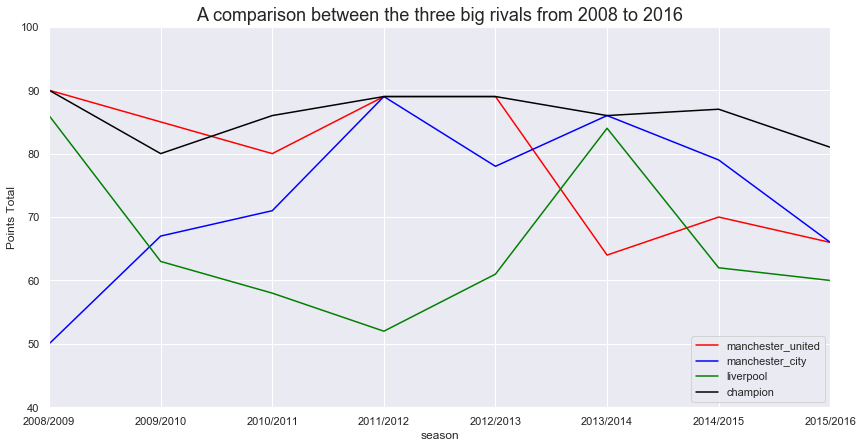

In [43]:
# visualize the results
fig, ax = plt.subplots(figsize=(14,7))
points_total.plot(kind='line',x='season',y='manchester_united', color='red', ax=ax)
points_total.plot(kind='line',x='season',y='manchester_city', color='blue', ax=ax)
points_total.plot(kind='line',x='season',y='liverpool', color='green', ax=ax)
points_total.plot(kind='line',x='season',y='champion', color='black', ax=ax)
ax.set_ylabel('Points Total')
ax.set_title('A comparison between the three big rivals from 2008 to 2016', size="18")
ax.set(ylim = [40, 100])
ax.legend(loc="lower right")

plt.show()

Average Points Manchester United: 79.125
Average Points Manchester City: 73.25
Average Points Liverpool: 65.75
Average Points Champion: 86.0


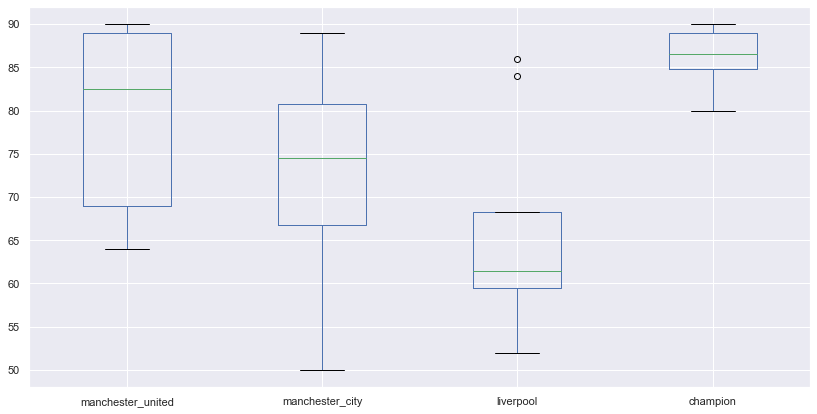

In [54]:
points_total.boxplot(column=['manchester_united', 'manchester_city', 'liverpool', 'champion'], figsize=(14,7))
print("Average Points Manchester United: " + str(np.mean(points_total['manchester_united'])))
print("Average Points Manchester City: " + str(np.mean(points_total['manchester_city'])))
print("Average Points Liverpool: " + str(np.mean(points_total['liverpool'])))
print("Average Points Champion: " + str(np.mean(points_total['champion'])))

<a id='conclusions'></a>
## Conclusions

### How well does Bet365 predict the outcome of a game?

> 1) We found out that home wins, consistently, occur more often than draws and away wins. This might be explained by more support through fans and familiarity with the pitch the game is played on in favor of the home team. However, this result is only representative for the English Premier League. One has to be careful to draw conclusions for other leagues. Overall, using the results from 8 Premier League seasons, we can say with some certainty that home wins occur roughly for 46% of all the matches played, followed by away wins with 28% and away wins 26%.

> 2) In order to give an estimate on how well bookkeepers (i.e. Bet365) predict the outcome of a match, we looked at the odds they provided for each match. Based on that, we could derive which teams were in favour of the bookkeepers. We have to keep in mind however that bookkeepers always are tending to one team when giving predictions (either home wins or away wins). When taking into account draws as well, we found that Bet365 was only able to predict the right outcome 52% of the time. In the season 2015/16, the right predictions were even less than 50%. This can be explained by a season coined as a "huge upset season" by many experts in which Leicester City became the crowning champion, a feet that was so unlikely that the odds on that were 5000/1 (source: https://www.businessinsider.com/leicester-city-odds-were-a-sham-2016-5?r=DE&IR=T)

> 3) Hence, in order to cut some slack for the bookies, I decided to drop the rows where the actual outcome of the game was "Draws" because this did not fall into the subset of possible predictions. When dropping those rows, the percentage of right predictions shoot up to almost 72% which might explain why many people who only gamble occassionally trust in the predictions of the bookkeepers. However, it still indicates an error for almost every fourth game when you bet only on win/loss outcomes. Therefore, you should always be aware of the fact that no matter how high the probability is that you might make some money gambling, it is still a game of soccer where anything can happen.

### The rivalry among Manchester United, Manchester City and Liverpool - a new sheriff in town?

> 1) Some background: As a big Manchester United fan, I personally experienced some great times until the season 2012/2013. Back then, ManUtd was the No.1 in England from a sole sports perspective. But with the retirement of Sir Alex Ferguson (manager), times started to look more gloomy for all ManUtd-fans. From 2012/2013 until today, ManUtd had 7 different managers which is completely different to how the club was managed before. In the meantime, two clubs now became the new favourites every season on winning the Premier League title: Manchester City and Liverpool. With my analysis, I wanted to have a look when those two clubs started to shoot for the title and when exactly ManUtd's "downfall" started.

> 2) For that we created a summary table grouped by each season and how many points each club accummulated in those respective seasons. We also added a new column based on external data that showed how many points were needed to become champion in that season. Looking only at the data provided, we can see that there were 4 champions in the given timeframe of 8 years: Manchester United (3), Chelsea and Manchester City (both 2) and Leicester City. As I said in 1) and what you can see in the figure "A comparison between the three big rivals from 2008 to 2016", with Sir Alex Ferguson's retirement after the season 2012/2013, which ended in a championship for Manchester United, the demise began. Until then, each season ManUtd accummulated at least 80 points per campaign. After that season, it was never more than 70 points. 
In the meantime, Manchester City shot out of nowhere after 2008/2009 starting to challenge for the title as well. This can be explained (not in the data) with a huge financial takeover and endowment by Arabian investors back then. The club managed (with the money) to invest very strategically into expertise, infrastructure and players and with that to become serious title contenders. Today, Manchester City is always the top-favorite every season for the title. The season 2011/2012 was a highly dramatic season with both Manchester clubs having the same amount of points in the end (89) but Manchester City won by more goals scored. In the given timeframe, Liverpool's only serious title contention was in 2013/2014 but they lost by a small margin to Manchester City.

> 3) The final visualization is a boxplot indicating, how large the spread of points in each season were for every team and the champion. We can see that Manchester United seasons with regards to points are skewed to the left due to the fact that they had very successful campaigns until 2012/2013 and less successful afterwards. Manchester City covers the whole spectrum from 50 points - 89 points showing its sudden jump into the top of the league. Liverpool had fairly mediocre seasons averaging around 65 points, with two outliers in the mid 80s. Finally, we can see that for a title challenging campaign, a club should aim to at least get 85 points. (Remark: last season (2018/2019), Liverpool lost to Manchester City, yet again by the smallest of margins, even though accummulating 99 points.)